# Chain Rule for Partial Derivatives

In a situation where we have nested univariate functions like, let's say: $y = f(u)$ and $u = g(x)$, we can use the chain rule to find the derivative of $y$ with respect to $x$ $\frac{dy}{dx}$:
$$\frac{dy}{dx} = \frac{dy}{du}\frac{du}{dx}$$

With univariate functions, the partial derivative $\frac{\partial y}{\partial x}$ is identical:


$$\frac{dy}{dx} = \frac{\partial y}{\partial x} = \frac{\partial y}{\partial u}\frac{\partial u}{\partial x}$$

With a multivariate function, the partial derivative is more interesting. Say we have $y = f(u)$ and $u = g(x, z)$:


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sympy as sp
import torch

In [32]:
def create_chain_rule_graph(
    nodes_data=None,
    edges_data=None,
    positions=None,
    node_styles=None,
    figsize=(4, 4),
    title="Chain Rule Relationships"
):
    """
    Create a directed graph visualization for chain rule relationships.

    Parameters:
    -----------
    nodes_data : dict
        Dictionary mapping node names to their types (e.g., {'y': 'output'})
    edges_data : list
        List of tuples (source, target, label) representing derivatives
    positions : dict
        Dictionary mapping node names to positions (x, y)
    node_styles : dict
        Dictionary mapping node types to style properties
    figsize : tuple
        Figure size (width, height)
    title : str
        Title for the graph
    """
    # Use default values if not provided
    if nodes_data is None:
        nodes_data = {
            'y': 'output',
            'u': 'intermediate',
            'x': 'input',
            'z': 'input'
        }

    if edges_data is None:
        edges_data = [
            ('y', 'u', '∂y/∂u'),
            ('u', 'x', '∂u/∂x'),
            ('u', 'z', '∂u/∂z')
        ]

    if positions is None:
        positions = {
            'y': (0, 0),
            'u': (1, 0),
            'x': (2, 0.5),
            'z': (2, -0.5)
        }

    if node_styles is None:
        node_styles = {
            'input': {'color': 'limegreen', 'size': 700},
            'intermediate': {'color': 'lightgray', 'size': 700},
            'output': {'color': 'tomato', 'size': 700}
        }

    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes with types
    G.add_nodes_from([(node, {'type': node_type}) for node, node_type in nodes_data.items()])

    # Add edges with labels
    G.add_edges_from([(u, v, {'label': label}) for u, v, label in edges_data])

    # Create figure and axes
    fig, ax = plt.subplots(figsize=figsize)

    # Draw nodes by type
    for node_type, style in node_styles.items():
        nodelist = [n for n, d in G.nodes(data=True) if d.get('type') == node_type]
        if nodelist:
            nx.draw_networkx_nodes(G, positions,
                                  nodelist=nodelist,
                                  node_color=style['color'],
                                  node_size=style['size'],
                                  ax=ax)

    # Draw edges and labels
    nx.draw_networkx_edges(G, positions, arrows=True, arrowsize=15, width=2, ax=ax)
    nx.draw_networkx_labels(G, positions, font_weight='bold', font_size=12, ax=ax)

    # Add edge labels
    edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, positions, edge_labels=edge_labels, font_size=10, ax=ax)

    # Finishing touches
    ax.set_title(title)
    ax.axis('off')
    plt.tight_layout()
    return ax

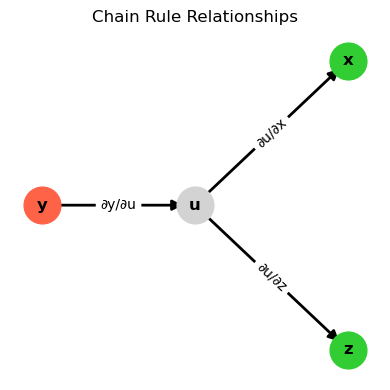

In [164]:
# Example: Create a more complex graph
nodes = {
    'y': 'output',
    'u': 'intermediate',
    #'v': 'intermediate',
    'x': 'input',
    'z': 'input',
    #'w': 'input'
}

edges = [
    ('y', 'u', '∂y/∂u'),
    #('y', 'v', '∂y/∂v'),
    ('u', 'x', '∂u/∂x'),
    ('u', 'z', '∂u/∂z'),
    #('v', 'z', '∂v/∂z'),
    #('v', 'w', '∂v/∂w')
]

positions = {
    'y': (0, 0),
    'u': (0.5, 0),
    #'v': (1, 1.5),
    'x': (1, 0.5),
    'z': (1, -0.5),
    #'w': (2, 2)
}

create_chain_rule_graph(nodes, edges, positions)
plt.show()

$$\frac{\partial y}{\partial x} = \frac{\partial y}{\partial u}\frac{\partial u}{\partial x}$$

$$\frac{\partial y}{\partial z} = \frac{\partial y}{\partial u}\frac{\partial u}{\partial z}$$

And with multiple multivariate functions, say $y = f(u, v)$, $u = g(x, z)$ and $v = h(x, z)$:

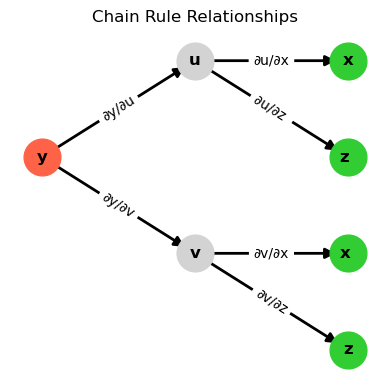

In [209]:
# Example: Create a more complex graph
nodes = {
    'y': 'output',
    'u': 'intermediate',
    'v': 'intermediate',
    'x': 'input',
    'x ': 'input',
    'z': 'input',
    'z ': 'input'
}

edges = [
    ('y', 'u', '∂y/∂u'),
    ('y', 'v', '∂y/∂v'),
    ('u', 'x', '∂u/∂x'),
    ('v', 'z', '∂v/∂z'),
    ('v', 'x ', '∂v/∂x'),
    ('u', 'z ', '∂u/∂z ')

]

positions = {
    'y': (0, 1),
    'v': (1, 0.5),
    'u': (1, 1.5),
    'z': (2, 0),
    'x ': (2, 0.5),
    'z ': (2, 1),
    'x': (2, 1.5)
}

create_chain_rule_graph(nodes, edges, positions)
plt.show()

$$\frac{\partial y}{\partial x} = \frac{\partial y}{\partial u}\frac{\partial u}{\partial x} + \frac{\partial y}{\partial v}\frac{\partial v}{\partial x}$$

$$\frac{\partial y}{\partial z} = \frac{\partial y}{\partial u}\frac{\partial u}{\partial z} + \frac{\partial y}{\partial v}\frac{\partial v}{\partial z}$$

A complete generalization of the chain rule for partial derivatives would be: $y = f(u_1, u_2, \ldots, u_m)$ and $u_j = g(x_1, x_2, \ldots, x_n)$.

For $i = 1, \ldots, n$:

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial u_1}\frac{\partial u_1}{\partial x_i} + \frac{\partial y}{\partial u_2}\frac{\partial u_2}{\partial x_i} + \ldots + \frac{\partial y}{\partial u_m}\frac{\partial u_m}{\partial x_i}$$

Let's find the partial derivatives of $y$, where:

1. $y = f(u, v)$, $u = g(x)$, $v = h(z)$

$$\frac{\partial y}{\partial x} = \frac{\partial y}{\partial u}\frac{\partial u}{\partial x}$$

$$\frac{\partial y}{\partial z} = \frac{\partial y}{\partial v}\frac{\partial v}{\partial z}$$

2. $y = f(u, v)$, $u = g(x)$, $v = h(x, z)$

$$\frac{\partial y}{\partial x} = \frac{\partial y}{\partial u}\frac{\partial u}{\partial x} + \frac{\partial y}{\partial v}\frac{\partial v}{\partial x}$$
$$\frac{\partial y}{\partial z} = \frac{\partial y}{\partial v}\frac{\partial v}{\partial z}$$

3. $y = f(u, v, w)$, $u = g(x)$, $v = h(x), w = j(x)$

$$\frac{\partial y}{\partial x} = \frac{\partial y}{\partial u}\frac{\partial u}{\partial x} + \frac{\partial y}{\partial v}\frac{\partial v}{\partial x} + \frac{\partial y}{\partial w}\frac{\partial w}{\partial x}$$

## Gradient of a single-point regression

In [229]:
xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

The slope is given by $y = mx + b$:

In [230]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

Let's initialize the slope and intercept:

In [231]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

To keep the partial derivatives as simple as possible, let's move forward with a single instance $i$ from the eight possible data points:

In [232]:
i = 7
x = xs[i]
y = ys[i]

In [233]:
x

tensor(7.)

In [234]:
y

tensor(-1.3700)

We can flow the scalar tensor $x$ through our regression model to produce $\hat{y}$, an estimate of $y$. Prior to any model training, this is an arbitrary estimate:

In [235]:
yhat = regression(x, m, b)
yhat

tensor([6.4000], grad_fn=<AddBackward0>)

Let's now compare the estimate $\hat{y}$ to the actual $y$ to calculate the cost $C$: $C = (\hat{y} - y)^2$.

In [236]:
def squared_error(my_yhat, my_y):
    return (my_yhat - my_y)**2

In [237]:
C = squared_error(yhat, y)
C

tensor([60.3729], grad_fn=<PowBackward0>)

Let's now calculate the gradient of $C$ with respect to $m$ and $b$:

In [238]:
C.backward()

The partial derivatives of $C$ with respect to $m$ and $b$ are stored in the `.grad` attribute of the tensors.

Let's start with $m$:
$$m\bigg(\frac{\partial C}{\partial m}\bigg)$$

In [239]:
m.grad

tensor([108.7800])

And then $b$:
$$b\bigg(\frac{\partial C}{\partial b}\bigg)$$

In [240]:
b.grad

tensor([15.5400])

Let's now derive $\frac{\partial C}{\partial m}$ and $\frac{\partial C}{\partial b}$ using the chain rule.

$C = (\hat{y} - y)^2$

$C = u^2$, where $u = \hat{y} - y$

$$\frac{\partial u}{\partial \hat{y}} = 1 - 0 = 1$$

$$\frac{dC}{du} = \frac{\partial C}{\partial u} = 2u = 2(\hat{y} - y)$$

$$\frac{\partial C}{\partial \hat{y}} = \frac{\partial C}{\partial u} \frac{\partial u}{\partial \hat{y}} = (2(\hat{y} - y))(1) = 2(\hat{y} - y)$$


$\hat{y} = mx + b$

$$\frac{\partial \hat{y}}{\partial b} = 0 + 1 = 1$$

$$\frac{\partial \hat{y}}{\partial m} = (1)x + 0 = x$$

Using the chain rule:

$$\frac{\partial C}{\partial m} = \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial m} = (2(\hat{y} - y))x = 2x(\hat{y} - y)$$

$$\frac{\partial C}{\partial b} = \frac{\partial C}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial b} = (2(\hat{y} - y))1 = 2(\hat{y} - y)$$

In [242]:
2*x*(yhat.item() - y)

tensor(108.7800)

In [243]:
2*(yhat.item() - y)

tensor(15.5400)

The gradient of cost, $\nabla C$, is a vector of the partial derivatives of $C$ with respect to each of the individual parameters:

$$\nabla C = \nabla_p C = \left[ \frac{\partial{C}}{\partial{p_1}}, \frac{\partial{C}}{\partial{p_2}}, \cdots, \frac{\partial{C}}{\partial{p_n}} \right]^T$$

In this case, we have two parameters, $m$ and $b$, so the gradient is a vector of two elements:

$$\nabla C = \left[ \frac{\partial{C}}{\partial{b}}, \frac{\partial{C}}{\partial{m}} \right]^T$$

In [245]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradient

tensor([[ 15.5400],
        [108.7800]])

Let's now calculate the gradient of the MSE of a batch of data.

In [251]:
xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

In [252]:
yhats = regression(xs, m, b)
yhats

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

In [253]:
def mse(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [254]:
C = mse(yhats, ys)
C

tensor(19.6755, grad_fn=<DivBackward0>)

In [255]:
C.backward()

In [256]:
m.grad

tensor([36.3050])

In [257]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradient

tensor([[ 6.2650],
        [36.3050]])

In [258]:
def labeled_regression_plot(my_x, my_y, my_m, my_b, my_C, include_grad=True):

    title = 'Cost = {}'.format('%.3g' % my_C.item())
    if include_grad:
        xlabel = 'm = {}, m grad = {}'.format('%.3g' % my_m.item(), '%.3g' % my_m.grad.item())
        ylabel = 'b = {}, b grad = {}'.format('%.3g' % my_b.item(), '%.3g' % my_b.grad.item())
    else:
        xlabel = 'm = {}'.format('%.3g' % my_m.item())
        ylabel = 'b = {}'.format('%.3g' % my_b.item())

    fig, ax = plt.subplots()

    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    ax.scatter(my_x, my_y, zorder=3)

    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max], c='C01')

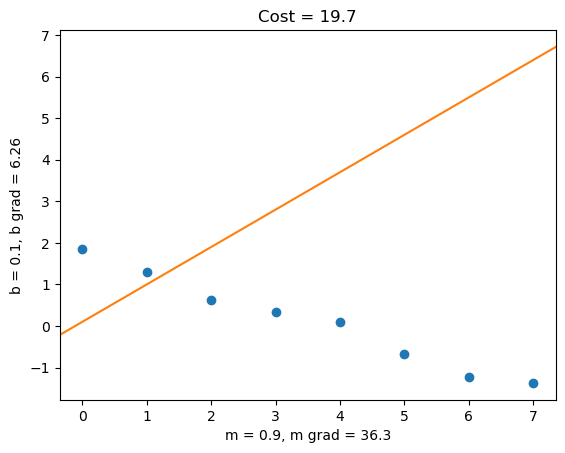

In [259]:
labeled_regression_plot(xs, ys, m, b, C)

In [260]:
optimizer = torch.optim.SGD([m, b], lr=0.01)

In [261]:
optimizer.step()

In [262]:
C = mse(regression(xs, m, b), ys)

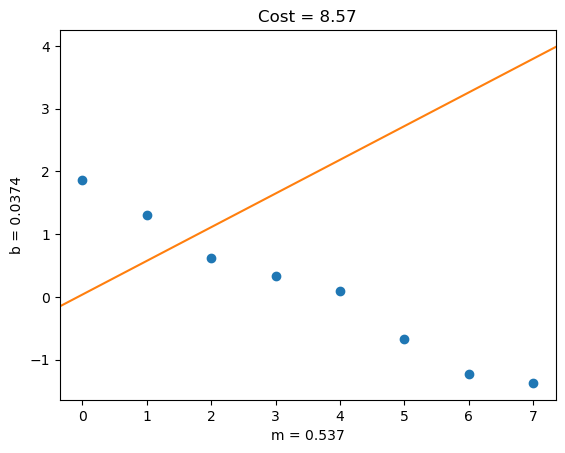

In [263]:
labeled_regression_plot(xs, ys, m, b, C, include_grad=False) # Gradient of C hasn't been recalculated

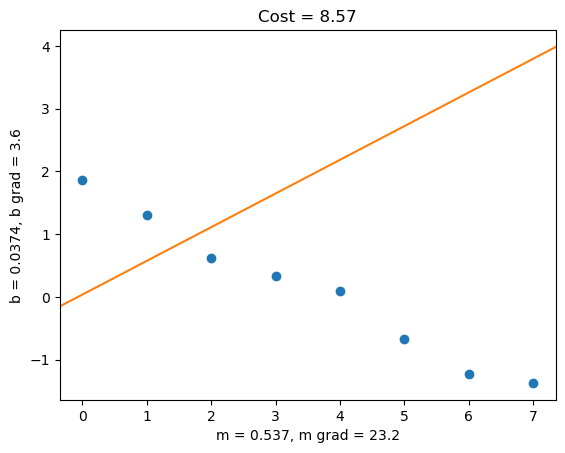

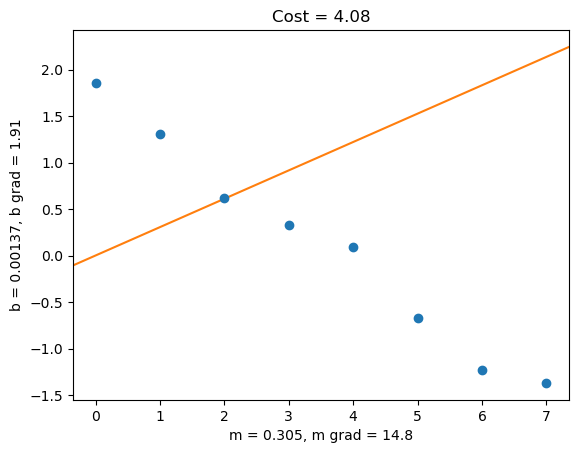

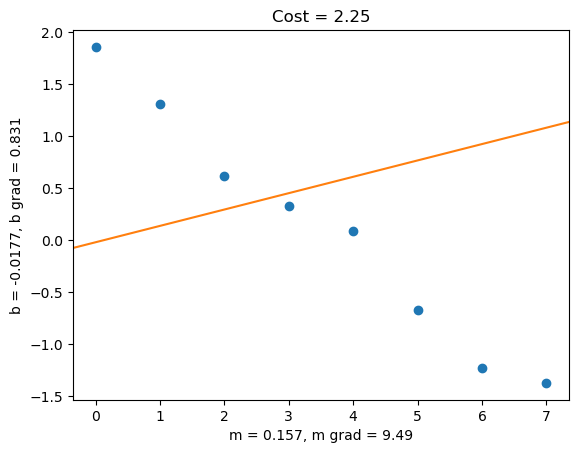

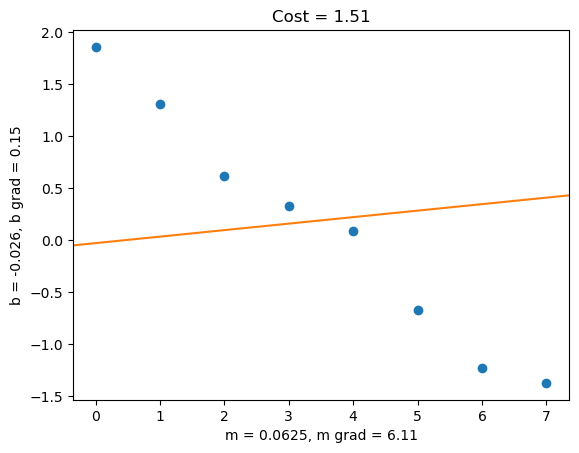

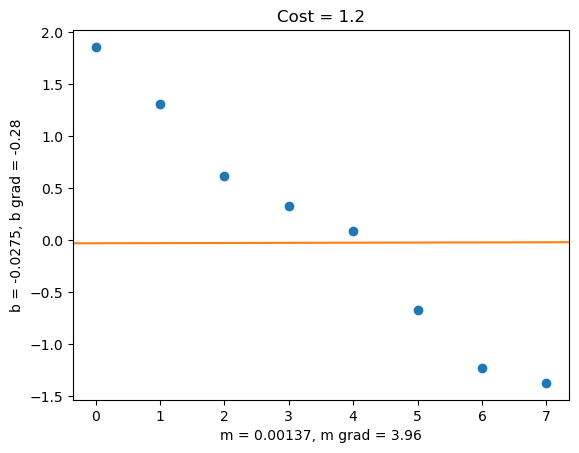

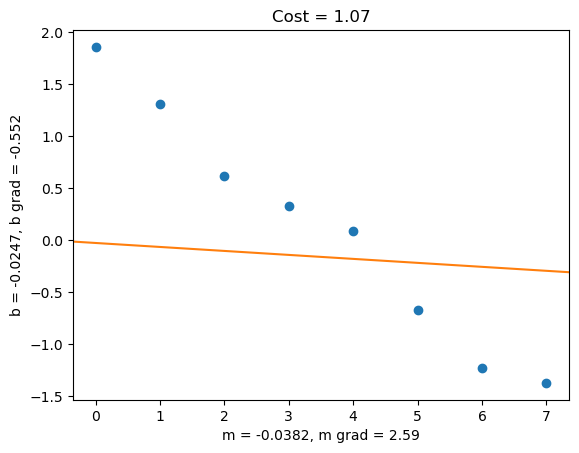

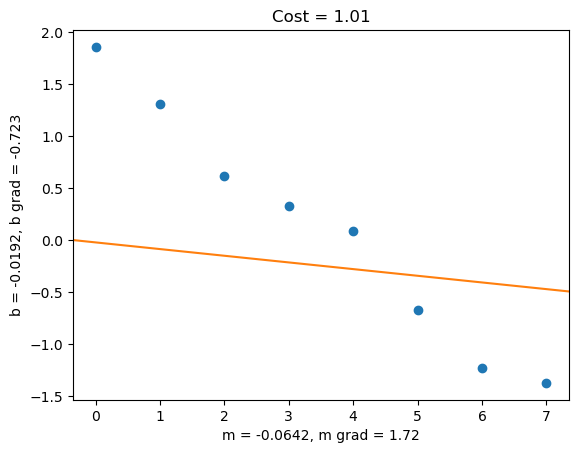

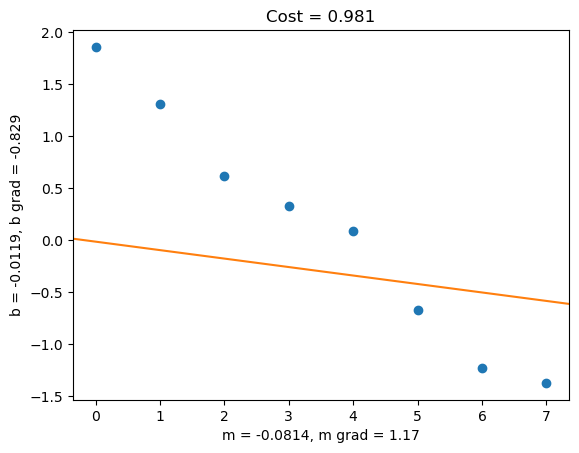

In [264]:
epochs = 8
for epoch in range(epochs):

    optimizer.zero_grad() # Reset gradients to zero; else they accumulate

    yhats = regression(xs, m, b) # Step 1
    C = mse(yhats, ys) # Step 2

    C.backward() # Step 3

    labeled_regression_plot(xs, ys, m, b, C)

    optimizer.step() # Step 4